# Sphering

## Dataset construction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

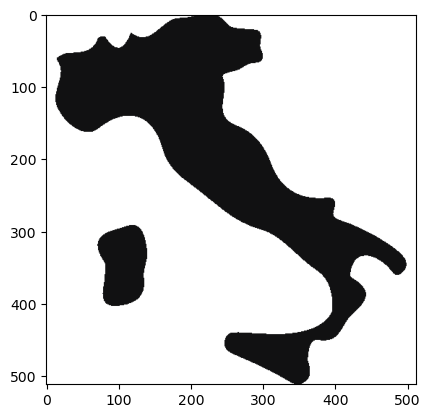

In [2]:
img = cv2.imread("figs/italy.png")
plt.imshow(img)
plt.show()

In [3]:
X, Y = np.where(img[:,:,0] != 255)
sampling = 100  # to have less points
X, Y = X[::sampling], Y[::sampling]

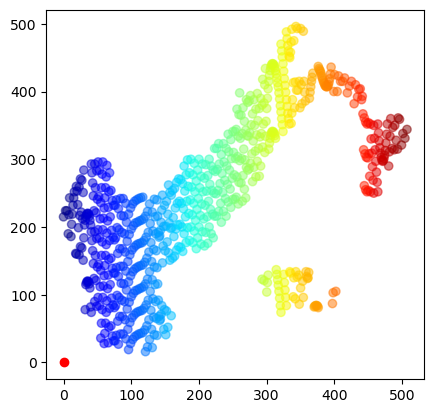

In [4]:
plt.scatter(X, Y, c=X, marker='o', cmap='jet', alpha=0.5)
plt.scatter(0, 0, c='red')
plt.axis('scaled')
plt.show()

## Standardizing the dataset

In [5]:
points = np.stack((X,Y), axis=1)
print(points)

mean = X.mean(axis=0)
std = X.std(axis=0)
points = (points-mean) / std

[[  0 215]
 [  3 224]
 [  5 224]
 ...
 [501 338]
 [504 331]
 [507 344]]


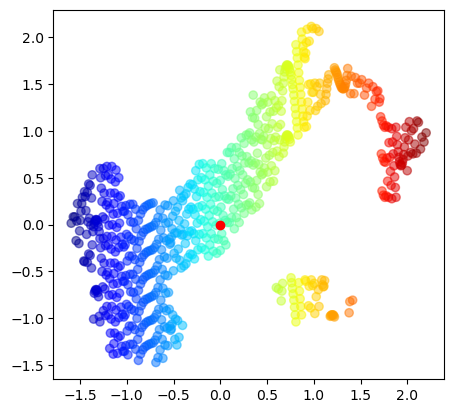

In [6]:
plt.scatter(*points.T, c=X, marker='o', cmap='jet', alpha = 0.5)
plt.scatter(0, 0, c='red')
plt.axis('scaled')
plt.show()

## Eigendecomposition of the data covariance matrix

In [7]:
C = np.cov(points, rowvar=False)
Sigma, U = np.linalg.eig(C)
Sigma = np.diag(Sigma)

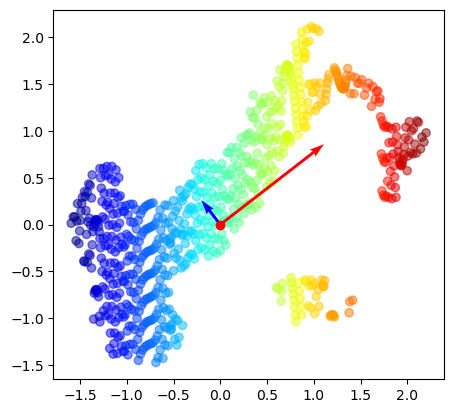

In [8]:
plt.scatter(*points.T, c=X, marker='o', cmap='jet', alpha=0.5)
plt.quiver([0,0], [0,0], *U@Sigma, color=['r','b'],angles='xy', scale_units='xy', scale=1)
plt.scatter(0, 0, c='red')
plt.axis('scaled')
plt.show()

## Decorrelation

In [9]:
rotated_points = (U.T@points.T).T
C_rotated = np.cov(rotated_points, rowvar=False)

In [10]:
C_rotated

array([[ 1.40311925e+00, -1.90749728e-17],
       [-1.90749728e-17,  3.31692586e-01]])

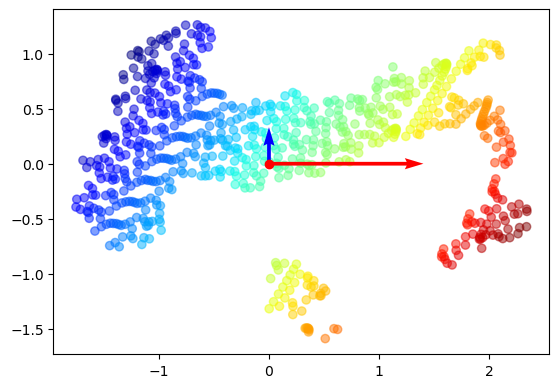

In [11]:
plt.scatter(*rotated_points.T, c=X, marker='o', cmap='jet', alpha=0.5)
plt.quiver([0,0], [0,0], *Sigma, color=['r','b'],angles='xy', scale_units='xy', scale=1)
plt.scatter(0, 0, c='red')
plt.axis('scaled')
plt.show()

## Sphering

In [12]:
Sigma_inv_sqrt = np.diag(np.diag(Sigma)**-0.5)

In [13]:
sphered_points = (Sigma_inv_sqrt@rotated_points.T).T
C_sphered = np.cov(sphered_points, rowvar=False)

In [14]:
C_sphered

array([[ 1.00000000e+00, -4.76874319e-17],
       [-4.76874319e-17,  1.00000000e+00]])

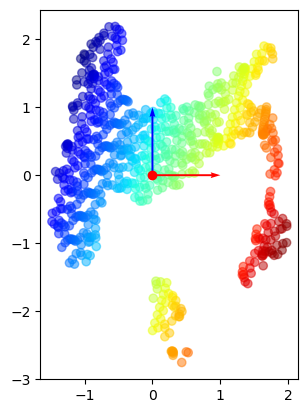

In [15]:
plt.scatter(*sphered_points.T, c=X, marker='o', cmap='jet', alpha=0.5)
plt.quiver([0,0], [0,0], *C_sphered, color=['r','b'],angles='xy', scale_units='xy', scale=1)
plt.scatter(0, 0, c='red')
plt.axis('scaled')
plt.show()

## Graphic recap of the operations

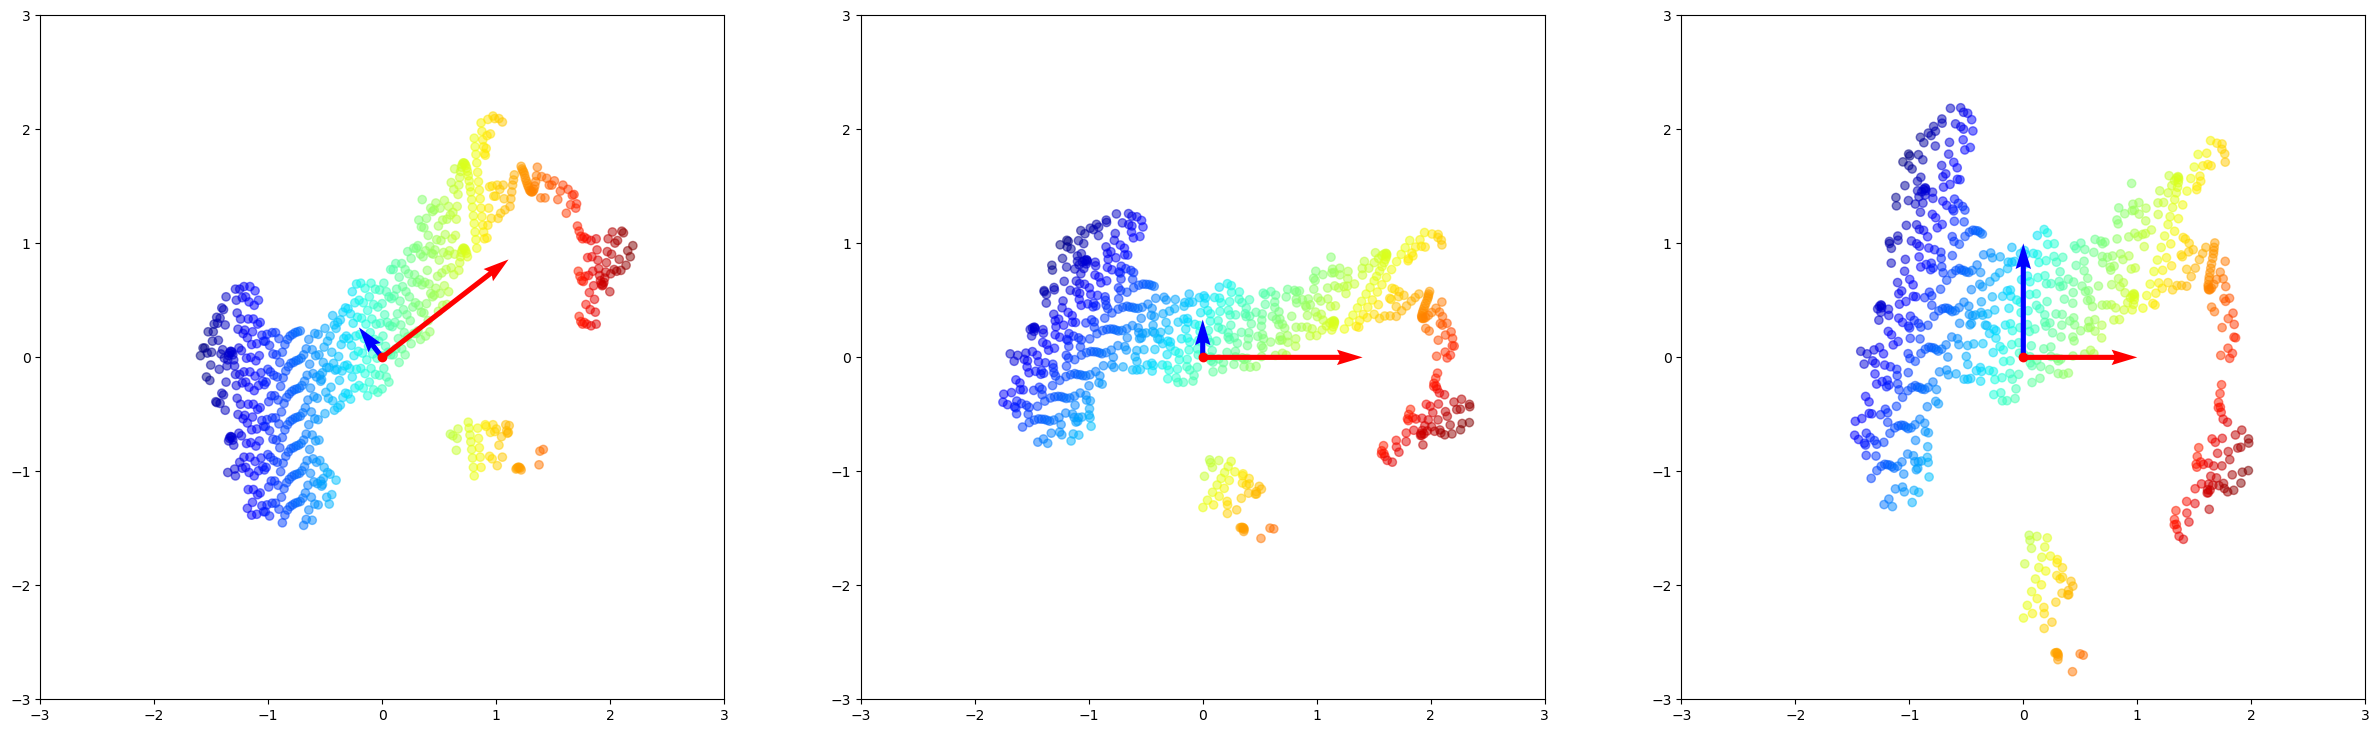

In [16]:
plt.figure(figsize=(30,30))

plt.subplot(1,3,1)
plt.scatter(*points.T, c=X, marker='o', cmap='jet', alpha=0.5)
plt.quiver([0,0], [0,0], *U@Sigma, color=['r','b'],angles='xy', scale_units='xy', scale=1)
plt.scatter(0, 0, c='red')
plt.axis('scaled')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.subplot(1,3,2)
plt.scatter(*rotated_points.T, c=X, marker='o', cmap='jet', alpha=0.5)
plt.quiver([0,0], [0,0], *Sigma, color=['r','b'],angles='xy', scale_units='xy', scale=1)
plt.scatter(0, 0, c='red')
plt.axis('scaled')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.subplot(1,3,3)
plt.scatter(*sphered_points.T, c=X, marker='o', cmap='jet', alpha=0.5)
plt.quiver([0,0], [0,0], *C_sphered, color=['r','b'],angles='xy', scale_units='xy', scale=1)
plt.scatter(0, 0, c='red')
plt.axis('scaled')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()